## Birthday Problem and Die Simulation 

### Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer.  Suppose there are $N$ students in a room.

#### Part a)

What is the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely to be a student's birthday and that there are no sets of twins.)

Note: Jupyter has two types of cells: Programming and Markdown. Programming is where you will create and run R code. The Markdown cells are where you will type out expalantions and mathematical expressions. [Here](https://www.markdownguide.org/basic-syntax/) is a document on Markdown some basic markdwon syntax. Also feel free to look at the underlying markdown of any of the provided cells to see how we use markdown.

\begin{align*}
    P(\text{At least two have same birthday}) &= 1 - \frac{365 \cdot 364 \cdots (365-N+1)}{365^N}
\end{align*}

**Explanation** There are $ 365^N $ ways to assign birthdays to the people in the room, since we can imagine the 365 days of the year being sampled **N times**, with replacement.
Let's the number of ways to assign birthdays to  people such that no two people share a birthday. <br>

$
P(\textrm{no birthday match}) = \frac{365 \cdot 364 \cdots (365-N+1)}{365^N}
$ <br>

Probability **at least two have same birthday** is a **complement** of **no birthday match**.


#### Part b)

How large must $N$ be so that the probability that at least two of them have the same birthday is at least 1/2?

N=23

**Explanation** <br>

$
1 - \frac{365 \cdot 364 \cdots (365-N+1)}{365^N} >= 1/2 $,   that is
<br>

$
   1/2 >= \frac{365 \cdot 364 \cdots (365-N+1)}{365^N} 
$ <br>

On solving we get N = 23

In [14]:
N = 23  # number of people in room
p <- numeric(N)  # create numeric vector to store probabilities
for (i in 1:N)      {
            q <- 1 - (0:(i - 1))/365  # 1 - prob(no matches)
            p[i] <- 1 - prod(q)  }
prob <- p[N]
prob

[1] 0.5072972

#### Part c)

Plot the number of students on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis.

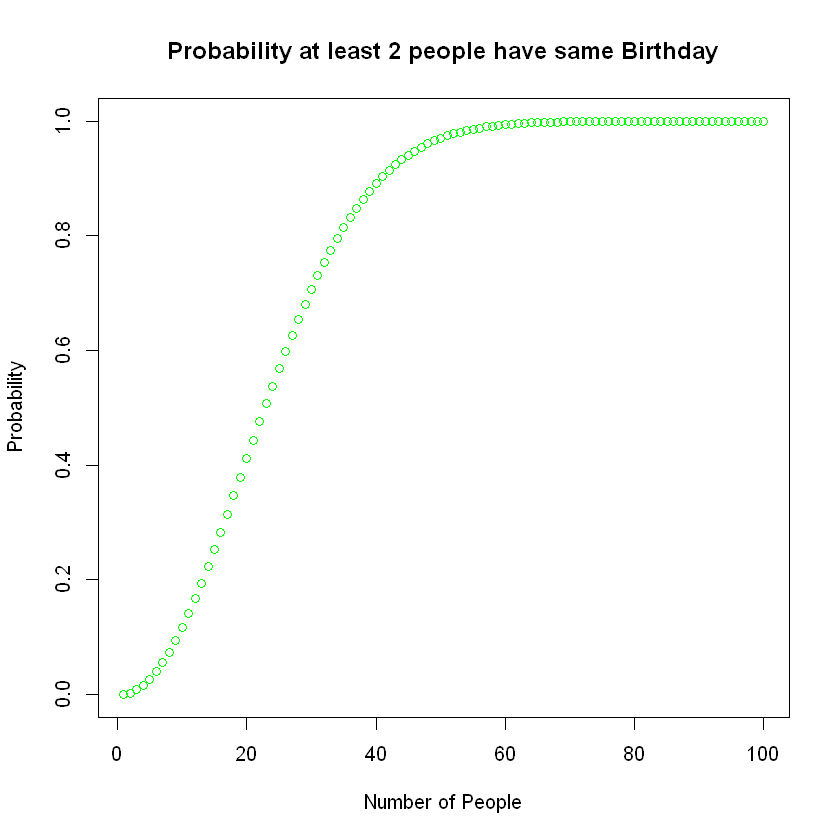

In [15]:
N = 100  # number of people in room
p <- numeric(N) 
for (i in 1:N)      {
            q = 1 - (0:(i - 1))/365 
            p[i] = 1 - prod(q)  }
plot(p, main="Probability at least 2 people have same Birthday", xlab ="Number of People", ylab = "Probability", col="green")        

#### Thought Question (Ungraded)

Thought question (Ungraded): Would you be surprised if there were 100 students in the room and no two of them had the same birthday?  What
would that tell you about that set of students?

Probability that in 100 students,no two of them have same birthday is very low that is 3.072489e-07.

In [16]:
Number_of_People <-c(seq(1,100,1))
Probabilities <- format(p, digits=3)
probs <- cbind(Number_of_People, Probabilities )   

head(probs,10)

Number_of_People,Probabilities
1,0.00000
2,0.00274
3,0.00820
4,0.01636
5,0.02714
6,0.04046
7,0.05624
8,0.07434
9,0.09462
10,0.11695


# Problem 2 

One of the most beneficial aspects of R, when it comes to probability, is that it allows us to simulate data and random events. In the following problem, you are going to become familiar with these simulation functions and techniques.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. How would we go about simulating $X$?

Start by creating a list of numbers [1, 6]. Then use the `sample()` function with our list of numbers to simulate **a single** roll of the die, as in simulate $X$. We would recommend looking at the documentation for `sample()`, found [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample), or by executing `?sample` in a Jupyter cell.

In [17]:
X = sample(x = 1:6,size = 1,replace = TRUE)
X

[1] 5

**Part b)** 

In our initial problem, we said that $X$ comes from a fair die, meaning each value is equally likely to be rolled. Because our die has $6$ sides, each side should appear about $1/6^{th}$ of the time. How would we confirm that our simulation is fair?

What if we generate multiple instances of $X$? That way, we could compare if the simulated probabilities match the theoretical probabilities (i.e. are all $1/6$).

Generate $12$ instances of $X$ and calculate the proportion of occurances for each face. Do your simulated results appear to come from a fair die? Now generate $120$ instances of $X$ and look at the proportion of each face. What do you notice?

Note: Each time you run your simulations, you will get different values. If you want to guarantee that your simulation will result in the same values each time, use the `set.seed()` function. This function will allow your simulations to be reproducable.

In [18]:
set.seed(112358)
X = sample(x = 1:6,size = 12,replace = TRUE)
df1 = as.data.frame(table(X))
df1['Theoretical probbility'] = c(1/6,1/6,1/6,1/6,1/6,1/6)
df1['Experimental probbility'] =c(1/12,3/12,3/12,2/12,1/12,2/12)
df1

X,Freq,Theoretical probbility,Experimental probbility
1,1,0.1666667,0.08333333
2,3,0.1666667,0.25000000
3,3,0.1666667,0.25000000
4,2,0.1666667,0.16666667
5,1,0.1666667,0.08333333
6,2,0.1666667,0.16666667


In [19]:
set.seed(112358)
X = sample(x = 1:6,size = 120,replace = TRUE)
df2 = as.data.frame(table(X))
df2['Theoretical probbility'] = c(1/6,1/6,1/6,1/6,1/6,1/6)
df2['Experimental probbility'] =c(19/120,20/120,28/120,19/120,16/120,18/120)
df2

X,Freq,Theoretical probbility,Experimental probbility
1,19,0.1666667,0.1583333
2,20,0.1666667,0.1666667
3,28,0.1666667,0.2333333
4,19,0.1666667,0.1583333
5,16,0.1666667,0.1333333
6,18,0.1666667,0.1500000


A fair die has 6 faces numbered 1 through 6 that are each equally likely to show when the die is rolled.The theoretical probability that a fair die shows any of the face is $1/6^{th}$. <br>
But we can see the **experimental probability** of rolling a die is quite closer to **theoretical probability** in **120 instances** as camparerd to **12 instances** that is because the experimental probability got closer to the theoretical probability for higher number of instances that is **law of large numbers**. <br>

**Law of large numbers**, as the number of identically distributed, randomly generated variables increases, their **sample mean** approaches their **theoretical mean**.

**Part c)** 

What if our die is not fair? How would we simulate that?

Let's assume that $Y$ comes from an unfair six-sided die, where $P(Y=3)=1/2$ and all other face values have an equal probability of occuring. Use the `sample()` function to simulate this situation. Then display the proportion of each face value, to confirm that the faces occur with the desired probabilities. Make sure that $n$ is large enough to be confident in your answer.

In [20]:
set.seed(112358)
Y = sample (x  = 1:6, size = 100000, replace = TRUE, prob = c(1/10, 1/10, 1/2, 1/10,1/10,1/10))
df3 = as.data.frame(table(Y))
df3['Theoretical probbility'] = c(1/10, 1/10, 1/2, 1/10,1/10,1/10)
df3['Experimental probbility'] =c(9955/100000,9929/100000,50033/100000,10195/100000,9873/100000,10015/100000)
df3

Y,Freq,Theoretical probbility,Experimental probbility
1,9955,0.1,0.09955
2,9929,0.1,0.09929
3,50033,0.5,0.50033
4,10195,0.1,0.10195
5,9873,0.1,0.09873
6,10015,0.1,0.10015


As we can see in the above table that the Theoretical Probability is quite closer to Expermental probability for large valuse of **n**.